# Results of Experiments


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from functools import partial

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('results','final', "*.csv"))))

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1,Time taken,F1 Score from model
0,VQC,2,1024,3,3.0,12.0,12.0,0.112305,0.465558,NaN,NaN
1,VQC,2,1024,4,3.0,12.0,12.0,0.061523,0.261592,NaN,NaN
2,VQC,2,1024,4,4.0,12.0,12.0,0.034180,0.144284,NaN,NaN
3,VQC,2,1024,5,3.0,12.0,12.0,0.062500,0.252381,NaN,NaN
4,VQC,2,1024,5,4.0,12.0,12.0,0.016602,0.185386,NaN,NaN


In [46]:
df_ft = df[(df['No of features'].isin([2,4,8,12,16])) & (df['Model'] != 'Support Vector Machine') & (df['Model'] != 'QSVC Kernel') & (df['No of samples'] == 1024)]

In [16]:
df.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1,Time taken,F1 Score from model
0,VQC,2,1024,3,3.0,12.0,12.0,0.112305,0.465558,NaN,NaN
1,VQC,2,1024,4,3.0,12.0,12.0,0.061523,0.261592,NaN,NaN
2,VQC,2,1024,4,4.0,12.0,12.0,0.034180,0.144284,NaN,NaN
3,VQC,2,1024,5,3.0,12.0,12.0,0.062500,0.252381,NaN,NaN
4,VQC,2,1024,5,4.0,12.0,12.0,0.016602,0.185386,NaN,NaN


/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


Text(0.5, 1.0, 'Graph showing F1 scores against varying number of input features \nfor multiple classification algorithms.')

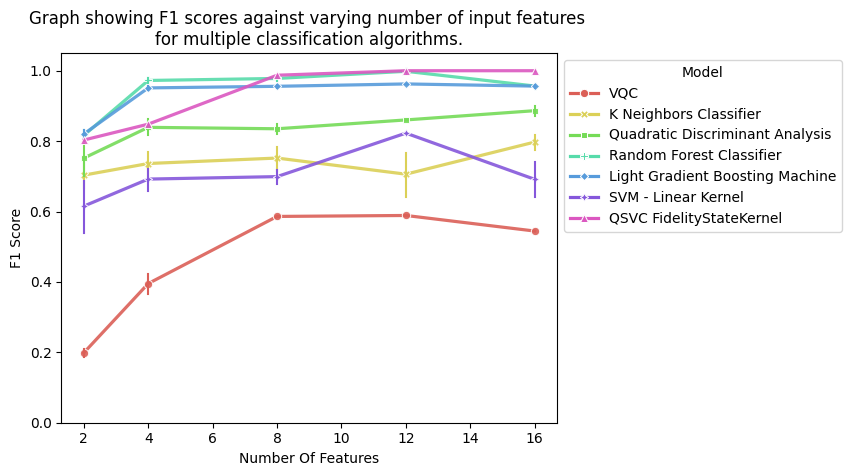

In [47]:

# plt.xscale('log')
ax = sns.lineplot(x="No of features", y="F1", data=df_ft, hue="Model", style="Model", dashes=False, palette="hls", markers=True, lw=2.3, err_style='bars')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,1.05)
ax.set(xlabel='Number Of Features', ylabel='F1 Score')
plt.setp(ax.lines, alpha=.9)   
plt.title('Graph showing F1 scores against varying number of input features \nfor multiple classification algorithms.')

/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/Users/prasham/miniconda3/envs/classical-ml-base/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/prasham/miniconda3/envs/classical-ml-b

Text(0.5, 1.0, 'Graph showing logarithmic training time against varying number of input features \nfor multiple classification algorithms.')

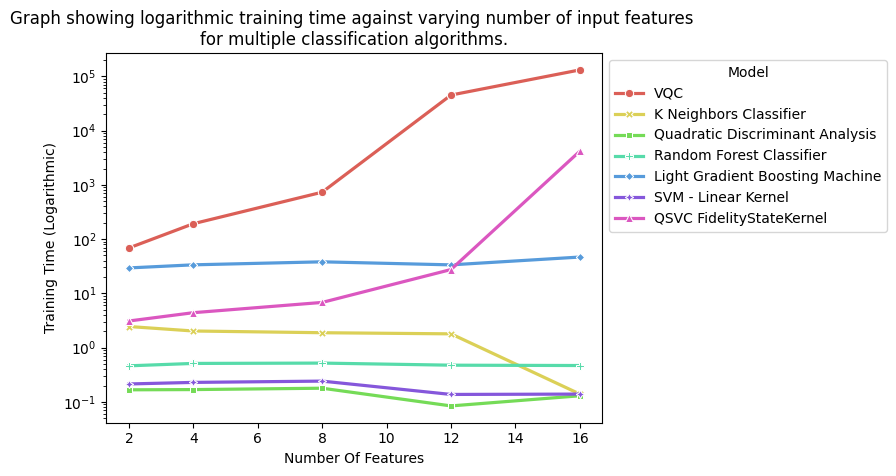

In [18]:

ax = sns.lineplot(x="No of features", y="Time taken", data=df_ft, hue="Model", style="Model", dashes=False, palette="hls", markers=True, lw=2.3, err_style='bars')
ax.set_yscale("log")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Number Of Features', ylabel='Training Time (Logarithmic)')
plt.title('Graph showing logarithmic training time against varying number of input features \nfor multiple classification algorithms.')

Text(0.5, 1.0, 'Graph showing accuracy against varying number of input features \nfor multiple classification algorithms.')

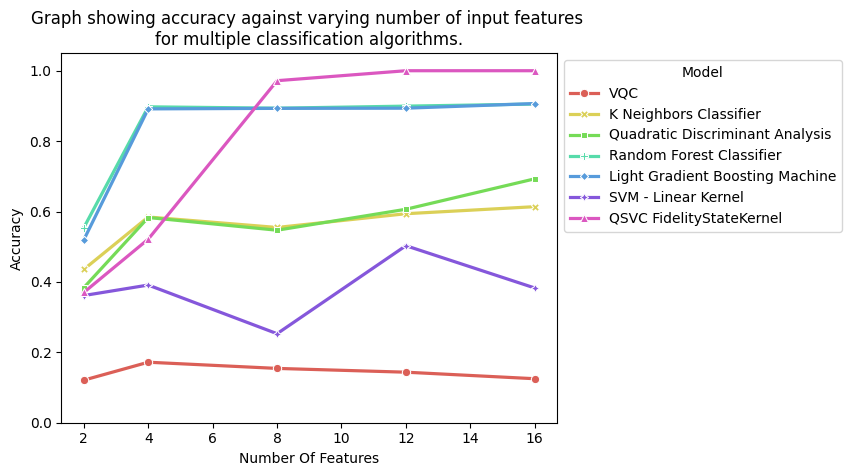

In [261]:
ax = sns.lineplot(x="No of features", y="Accuracy", data=df_ft, hue="Model", style="Model", dashes=False, palette="hls", markers=True, lw=2.3, errorbar=None)
ax.set_ylim(0,1.05)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Number Of Features', ylabel='Accuracy')
plt.title('Graph showing accuracy against varying number of input features \nfor multiple classification algorithms.')

## For Ansatz, featuremap reps increase.

In [33]:
df_forreps = df[(df['Model'].isin(['VQC'])) & (df['No of features'] <= 18)]

In [34]:
df_forreps.shape

(558, 11)

Text(0.5, 1.0, 'Graph showing F1 scores against varying number of feature map & ansatz repetitions \nfor variational quantum classifier (VQC) algorithm. ')

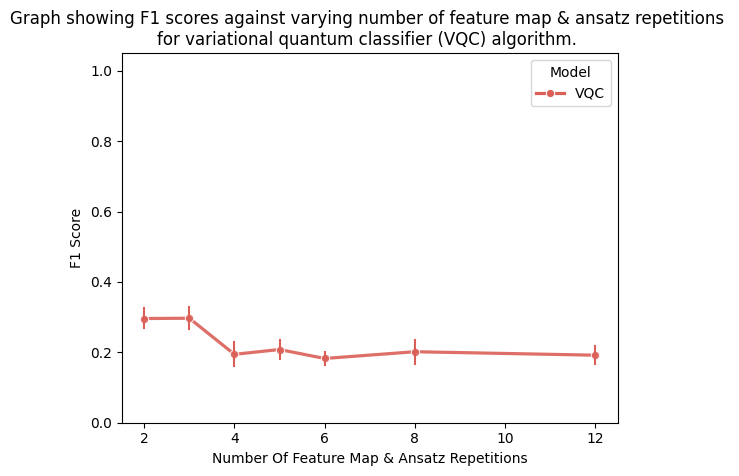

In [59]:
ax = sns.lineplot(x="No of ansatz reps", y="F1", data=df_forreps, hue="Model", style="Model", dashes=False, palette="hls", markers=True, lw=2.3, err_style='bars')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,1.05)
ax.set(xlabel='Number Of Feature Map & Ansatz Repetitions', ylabel='F1 Score')
plt.setp(ax.lines, alpha=.9)   
plt.title('Graph showing F1 scores against varying number of feature map & ansatz repetitions \nfor variational quantum classifier (VQC) algorithm. ')

Text(0.5, 1.0, 'Graph showing F1 scores against varying number of feature map, and ansatz \nrepetitions for variational quantum classifier (VQC) algorithm. ')

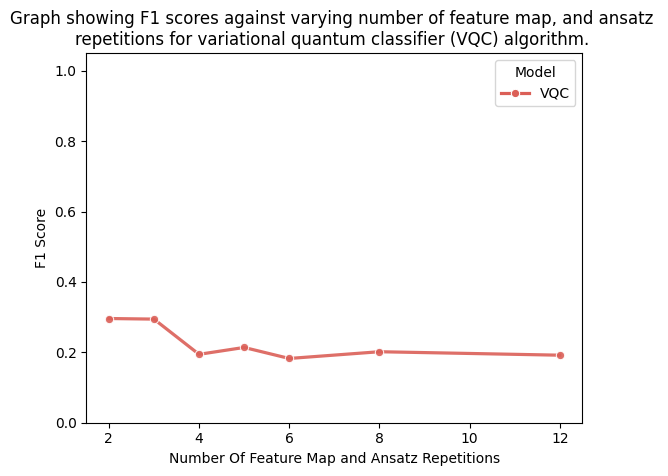

In [40]:
ax = sns.lineplot(x="No of feature map reps", y="F1", data=df_forreps, hue="Model", style="Model", dashes=False, palette="hls", markers=True, lw=2.3, errorbar=None)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,1.05)
ax.set(xlabel='Number Of Feature Map and Ansatz Repetitions', ylabel='F1 Score')
plt.setp(ax.lines, alpha=.9)   
plt.title('Graph showing F1 scores against varying number of feature map, and ansatz \nrepetitions for variational quantum classifier (VQC) algorithm. ')

In [246]:
df_forreps = df_forreps[df_forreps['No of classes'] == 3]

In [36]:
df_forreps

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1,Time taken,F1 Score from model
0,VQC,2,1024,3,3.0,12.0,12.0,0.112305,0.465558,NaN,NaN
1,VQC,2,1024,4,3.0,12.0,12.0,0.061523,0.261592,NaN,NaN
2,VQC,2,1024,4,4.0,12.0,12.0,0.034180,0.144284,NaN,NaN
3,VQC,2,1024,5,3.0,12.0,12.0,0.062500,0.252381,NaN,NaN
4,VQC,2,1024,5,4.0,12.0,12.0,0.016602,0.185386,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2415,VQC,2,1024,12,4.0,6.0,6.0,0.017578,0.070479,NaN,NaN
2416,VQC,2,1024,12,5.0,6.0,6.0,0.009766,0.088081,NaN,NaN
2417,VQC,2,1024,12,6.0,6.0,6.0,0.004883,0.091550,NaN,NaN
2418,VQC,2,1024,12,8.0,6.0,6.0,0.002930,0.245666,NaN,NaN


In [37]:
df_forreps_forprint = df_forreps[['Model', 'No of feature map reps', 'F1']]

In [38]:
df_forreps_forprint['F1'] = df_forreps_forprint['F1'].round(3)
df_forreps_forprint = df_forreps_forprint.pivot_table(columns='No of feature map reps', index='Model', values='F1')


/var/folders/4z/946_ygn50p3bc_rsjbq9cg240000gn/T/ipykernel_2340/2936146849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forreps_forprint['F1'] = df_forreps_forprint['F1'].round(3)


In [39]:
df_forreps_forprint

No of feature map reps,2.0,3.0,4.0,5.0,6.0,8.0,12.0
Model,,,,,,,
VQC,0.296031,0.294374,0.194238,0.213828,0.182571,0.201762,0.191952


In [251]:
df_forreps_forprint.to_latex()

/var/folders/4z/946_ygn50p3bc_rsjbq9cg240000gn/T/ipykernel_87391/1715633714.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_forreps_forprint.to_latex()


'\\begin{tabular}{lrrrrrrr}\n\\toprule\nNo of feature map reps &   2.0  &      3.0  &   4.0  &   5.0  &   6.0  &   8.0  &   12.0 \\\\\nModel &        &           &        &        &        &        &        \\\\\n\\midrule\nVQC   &  0.457 &  0.547143 &  0.647 &  0.417 &  0.372 &  0.538 &  0.466 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Printing table for results

In [55]:
df_ft['F1'] = df_ft['F1'].round(3)

/var/folders/4z/946_ygn50p3bc_rsjbq9cg240000gn/T/ipykernel_2340/3189000416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft['F1'] = df_ft['F1'].round(3)


In [56]:
df_forwrite = df_ft[['Model', 'No of features', 'F1']]

In [57]:
df_forwrite = df_forwrite.pivot_table(columns='No of features', index='Model', values='F1')

In [58]:
df_forwrite

No of features,2,4,8,12,16
Model,,,,,
K Neighbors Classifier,0.703349,0.736372,0.751930,0.706045,0.797182
Light Gradient Boosting Machine,0.820227,0.951111,0.955727,0.962000,0.956409
QSVC FidelityStateKernel,0.803000,0.848000,0.987000,1.000000,1.000000
Quadratic Discriminant Analysis,0.751628,0.839207,0.835136,0.860000,0.886364
Random Forest Classifier,0.816488,0.972349,0.978000,0.998364,0.956636
SVM - Linear Kernel,0.615273,0.692136,0.699273,0.823000,0.691636
VQC,0.198699,0.395406,0.586000,0.589000,0.545000


In [256]:
df_forwrite.to_latex()

/var/folders/4z/946_ygn50p3bc_rsjbq9cg240000gn/T/ipykernel_87391/408115068.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_forwrite.to_latex()


'\\begin{tabular}{lrrrrr}\n\\toprule\nNo of features &     2  &     4  &     8  &     12 &     16 \\\\\nModel                           &        &        &        &        &        \\\\\n\\midrule\nK Neighbors Classifier          &  0.779 &  0.860 &  0.847 &  0.850 &  0.868 \\\\\nLight Gradient Boosting Machine &  0.816 &  0.962 &  0.965 &  0.962 &  0.967 \\\\\nQSVC FidelityStateKernel        &  0.803 &  0.848 &  0.987 &  1.000 &  1.000 \\\\\nQuadratic Discriminant Analysis &  0.802 &  0.866 &  0.852 &  0.860 &  0.894 \\\\\nRandom Forest Classifier        &  0.831 &  0.966 &  0.965 &  0.964 &  0.967 \\\\\nSVM - Linear Kernel             &  0.803 &  0.775 &  0.669 &  0.823 &  0.722 \\\\\nVQC                             &  0.538 &  0.617 &  0.586 &  0.589 &  0.545 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [260]:
df_ft['Time taken'] = df_ft['Time taken'].round(3)
df_time_forwrite = df_ft[['Model', 'No of features', 'Time taken']]
df_time_forwrite = df_time_forwrite.pivot_table(columns='No of features', index='Model', values='Time taken', aggfunc='first')
df_time_forwrite

/var/folders/4z/946_ygn50p3bc_rsjbq9cg240000gn/T/ipykernel_87391/3748560575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft['Time taken'] = df_ft['Time taken'].round(3)


No of features,2,4,8,12,16
Model,,,,,
K Neighbors Classifier,2.449,2.025,1.882,1.794,0.139
Light Gradient Boosting Machine,29.447,33.578,38.154,33.527,46.722
QSVC FidelityStateKernel,3.096,4.406,6.810,27.492,4174.854
Quadratic Discriminant Analysis,0.167,0.169,0.179,0.084,0.130
Random Forest Classifier,0.462,0.511,0.519,0.475,0.468
SVM - Linear Kernel,0.214,0.229,0.241,0.137,0.139
VQC,68.729,192.284,732.892,45223.159,131429.982


In [192]:
df_time_forwrite.to_latex()

/var/folders/4z/946_ygn50p3bc_rsjbq9cg240000gn/T/ipykernel_87391/1801413966.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_time_forwrite.to_latex()


'\\begin{tabular}{lrrrrr}\n\\toprule\nNo of features &      2  &       4  &       8  &      12 &        16 \\\\\nModel                           &         &          &          &         &           \\\\\n\\midrule\nK Neighbors Classifier          &   2.449 &    2.025 &    1.882 &   1.794 &     0.139 \\\\\nLight Gradient Boosting Machine &  29.447 &   33.578 &   38.154 &  33.527 &    46.722 \\\\\nQSVC FidelityStateKernel        &   3.096 &    4.406 &    6.810 &  27.492 &  4174.854 \\\\\nQuadratic Discriminant Analysis &   0.167 &    0.169 &    0.179 &   0.084 &     0.130 \\\\\nRandom Forest Classifier        &   0.462 &    0.511 &    0.519 &   0.475 &     0.468 \\\\\nSVM - Linear Kernel             &   0.214 &    0.229 &    0.241 &   0.137 &     0.139 \\\\\nVQC                             &  68.729 &  192.284 &  732.892 &     NaN &       NaN \\\\\n\\bottomrule\n\\end{tabular}\n'

----

In [177]:
df = df[df["No of samples"] == 1024]

In [178]:
df.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
0,VQC,2,1024,3,3,2.0,2.0,0.067383,0.296266
1,VQC,2,1024,4,3,2.0,2.0,0.050781,0.267571
2,VQC,2,1024,4,4,2.0,2.0,0.036133,0.356173
3,VQC,2,1024,5,3,2.0,2.0,0.026367,0.095207
4,VQC,2,1024,5,4,2.0,2.0,0.027344,0.240474


In [179]:
df.Model.unique()

array(['VQC', 'K Neighbors Classifier', 'Quadratic Discriminant Analysis',
       'Random Forest Classifier', 'Light Gradient Boosting Machine',
       'SVM - Linear Kernel', 'QSVC Kernel'], dtype=object)

In [180]:
df.shape

(1332, 9)

## Grouping everything by

In [181]:
df_groups = df.groupby(["Model"], group_keys=False, dropna=True).apply(lambda x: x)

In [182]:
df_groups.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
0,VQC,2,1024,3,3,2.0,2.0,0.067383,0.296266
1,VQC,2,1024,4,3,2.0,2.0,0.050781,0.267571
2,VQC,2,1024,4,4,2.0,2.0,0.036133,0.356173
3,VQC,2,1024,5,3,2.0,2.0,0.026367,0.095207
4,VQC,2,1024,5,4,2.0,2.0,0.027344,0.240474


<AxesSubplot: xlabel='No of features', ylabel='F1'>

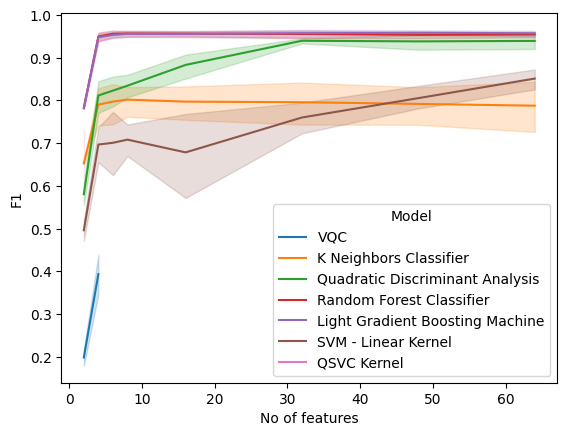

In [183]:
sns.lineplot(x="No of features", y="F1", data = df_groups, hue="Model")

In [184]:
df_VQC = df_groups[df_groups["Model"] == 'VQC']

In [185]:
df_VQC

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
0,VQC,2,1024,3,3,2.0,2.0,0.067383,0.296266
1,VQC,2,1024,4,3,2.0,2.0,0.050781,0.267571
2,VQC,2,1024,4,4,2.0,2.0,0.036133,0.356173
3,VQC,2,1024,5,3,2.0,2.0,0.026367,0.095207
4,VQC,2,1024,5,4,2.0,2.0,0.027344,0.240474
...,...,...,...,...,...,...,...,...,...
1487,VQC,4,1024,12,4,2.0,2.0,0.003906,0.098550
1488,VQC,4,1024,12,5,2.0,2.0,0.002930,0.175817
1489,VQC,4,1024,12,6,2.0,2.0,0.002930,0.258909
1490,VQC,4,1024,12,8,2.0,2.0,0.002930,0.357932


In [186]:
df_VQC_grouped = df_VQC.groupby(["No of labels", "No of feature map reps"], group_keys=True).apply(lambda x: x)

In [187]:
df_VQC_grouped.head()

Model  No of features  No of samples  \
No of labels No of feature map reps                                           
3            2.0                    0    VQC               2           1024   
                                    1    VQC               2           1024   
                                    3    VQC               2           1024   
                                    6    VQC               2           1024   
                                    10   VQC               2           1024   

                                        No of classes  No of labels  \
No of labels No of feature map reps                                   
3            2.0                    0               3             3   
                                    1               4             3   
                                    3               5             3   
                                    6               6             3   
                                    10              8             3   

                                        No of feature map reps  \
No of labels No of feature map reps                              
3            2.0                    0                      2.0   
                                    1                      2.0   
                                    3                      2.0   
                                    6                      2.0   
                                    10                     2.0   

                                        No of ansatz reps  Accuracy        F1  
No of labels No of feature map reps                                            
3            2.0                    0                 2.0  0.067383  0.296266  
                                    1                 2.0  0.050781  0.267571  
                                    3                 2.0  0.026367  0.095207  
                                    6                 2.0  0.054688  0.216896  
                                    10                2.0  0.035156  0.089421

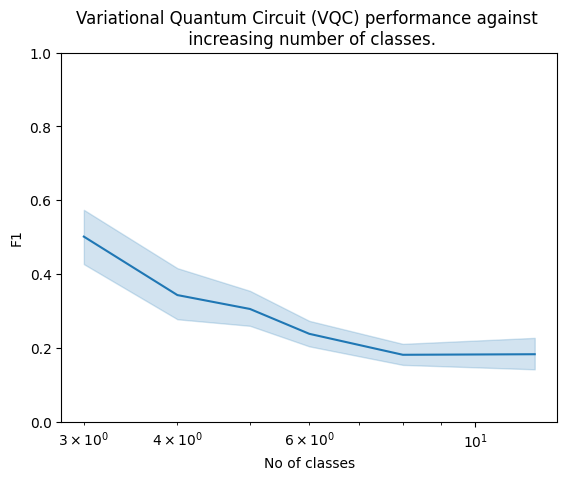

In [205]:
plt.ylim(0,1)
plt.xscale('log')
sns.lineplot(x="No of classes", y="F1", data = df_VQC_grouped)
plt.title("Variational Quantum Circuit (VQC) performance against \n increasing number of classes.")
plt.savefig("../quantum-thesis-writing/media/VQC-vs-no-of-classes.png")
plt.show()

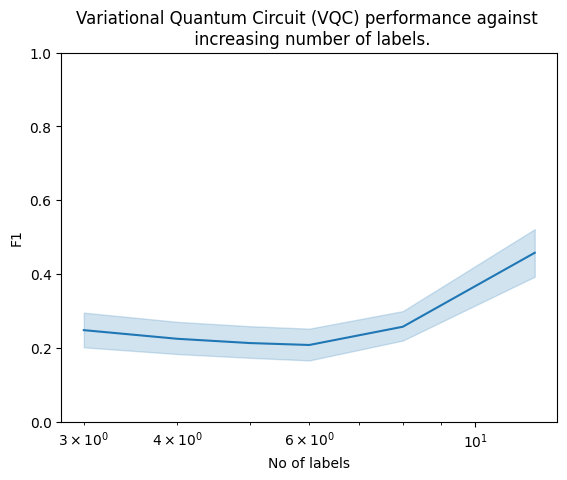

In [206]:
plt.ylim(0,1)
plt.xscale("log")
sns.lineplot(x="No of labels", y="F1", data = df_VQC_grouped)
plt.title("Variational Quantum Circuit (VQC) performance against \n increasing number of labels.")
plt.savefig("../quantum-thesis-writing/media/VQC-vs-no-of-labels.png")
plt.show()

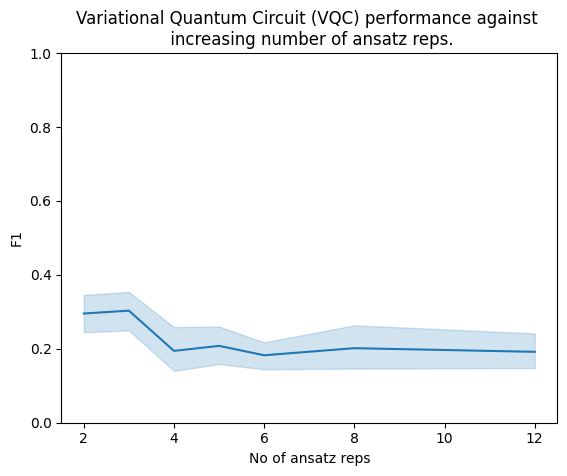

In [190]:
plt.ylim(0,1)
sns.lineplot(x="No of ansatz reps", y="F1", data = df_VQC_grouped)
plt.title("Variational Quantum Circuit (VQC) performance against \n increasing number of ansatz reps.")
plt.savefig("../quantum-thesis-writing/media/VQC-vs-no-of-ansatz-reps.png")
plt.show()

## for QSVC

In [191]:
df_QSVC = df_groups[df_groups["Model"] == 'QSVC Kernel']

In [192]:
df_QSVC.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
1044,QSVC Kernel,2,1024,3,3,2.0,NaN,0.369141,0.817481
1045,QSVC Kernel,2,1024,4,3,2.0,NaN,0.236328,0.747825
1046,QSVC Kernel,2,1024,4,4,2.0,NaN,0.323242,0.822685
1047,QSVC Kernel,2,1024,5,3,2.0,NaN,0.179688,0.751914
1048,QSVC Kernel,2,1024,5,4,2.0,NaN,0.205078,0.799334


In [193]:
df_QSVC_grouped = df_QSVC.groupby(["No of labels", "No of feature map reps"], group_keys=True).apply(lambda x: x)

In [194]:
df_QSVC_grouped.head()

Model  No of features  \
No of labels No of feature map reps                                     
3            2.0                    1044  QSVC Kernel               2   
                                    1045  QSVC Kernel               2   
                                    1047  QSVC Kernel               2   
                                    1050  QSVC Kernel               2   
                                    1054  QSVC Kernel               2   

                                          No of samples  No of classes  \
No of labels No of feature map reps                                      
3            2.0                    1044           1024              3   
                                    1045           1024              4   
                                    1047           1024              5   
                                    1050           1024              6   
                                    1054           1024              8   

                                          No of labels  \
No of labels No of feature map reps                      
3            2.0                    1044             3   
                                    1045             3   
                                    1047             3   
                                    1050             3   
                                    1054             3   

                                          No of feature map reps  \
No of labels No of feature map reps                                
3            2.0                    1044                     2.0   
                                    1045                     2.0   
                                    1047                     2.0   
                                    1050                     2.0   
                                    1054                     2.0   

                                          No of ansatz reps  Accuracy  \
No of labels No of feature map reps                                     
3            2.0                    1044                NaN  0.369141   
                                    1045                NaN  0.236328   
                                    1047                NaN  0.179688   
                                    1050                NaN  0.128906   
                                    1054                NaN  0.087891   

                                                F1  
No of labels No of feature map reps                 
3            2.0                    1044  0.817481  
                                    1045  0.747825  
                                    1047  0.751914  
                                    1050  0.656707  
                                    1054  0.380081

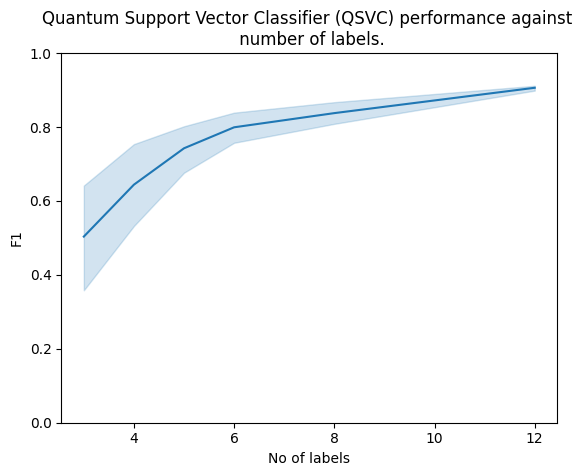

In [195]:
plt.ylim(0,1)
sns.lineplot(x="No of labels", y="F1", data = df_QSVC_grouped)
plt.title("Quantum Support Vector Classifier (QSVC) performance against \n number of labels.")
plt.savefig("../quantum-thesis-writing/media/QSVC-vs-no-of-labels.png")
plt.show()

## for Classical.

In [196]:
df_general = df[df["No of features"] <= 4]

In [197]:
df_general.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
0,VQC,2,1024,3,3,2.0,2.0,0.067383,0.296266
1,VQC,2,1024,4,3,2.0,2.0,0.050781,0.267571
2,VQC,2,1024,4,4,2.0,2.0,0.036133,0.356173
3,VQC,2,1024,5,3,2.0,2.0,0.026367,0.095207
4,VQC,2,1024,5,4,2.0,2.0,0.027344,0.240474


In [198]:
df_model_grouped = df_general.groupby(["Model", "No of features"], group_keys=True, dropna=True).apply(lambda x:x)

In [199]:
df_model_grouped.head()

Model  \
Model                  No of features                               
K Neighbors Classifier 2              162  K Neighbors Classifier   
                                      167  K Neighbors Classifier   
                                      172  K Neighbors Classifier   
                                      177  K Neighbors Classifier   
                                      182  K Neighbors Classifier   

                                           No of features  No of samples  \
Model                  No of features                                      
K Neighbors Classifier 2              162               2           1024   
                                      167               2           1024   
                                      172               2           1024   
                                      177               2           1024   
                                      182               2           1024   

                                           No of classes  No of labels  \
Model                  No of features                                    
K Neighbors Classifier 2              162              5             3   
                                      167              5             3   
                                      172              5             3   
                                      177              5             3   
                                      182              5             3   

                                           No of feature map reps  \
Model                  No of features                               
K Neighbors Classifier 2              162                     NaN   
                                      167                     NaN   
                                      172                     NaN   
                                      177                     NaN   
                                      182                     NaN   

                                           No of ansatz reps  Accuracy  \
Model                  No of features                                    
K Neighbors Classifier 2              162                NaN  0.300781   
                                      167                NaN  0.291992   
                                      172                NaN  0.296875   
                                      177                NaN  0.306641   
                                      182                NaN  0.298828   

                                                 F1  
Model                  No of features                
K Neighbors Classifier 2              162  0.650380  
                                      167  0.637917  
                                      172  0.652401  
                                      177  0.644944  
                                      182  0.664583

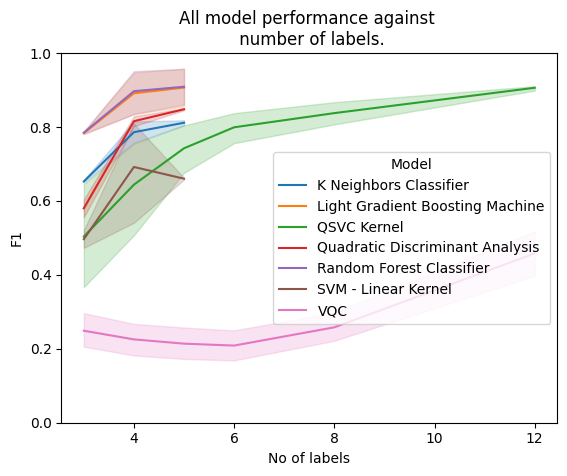

In [200]:
plt.ylim(0,1)
sns.lineplot(x="No of labels", y="F1", data = df_model_grouped, hue="Model")
plt.title("All model performance against \n number of labels.")
plt.savefig("../quantum-thesis-writing/media/All-models-vs-no-of-labels.png")
plt.show()

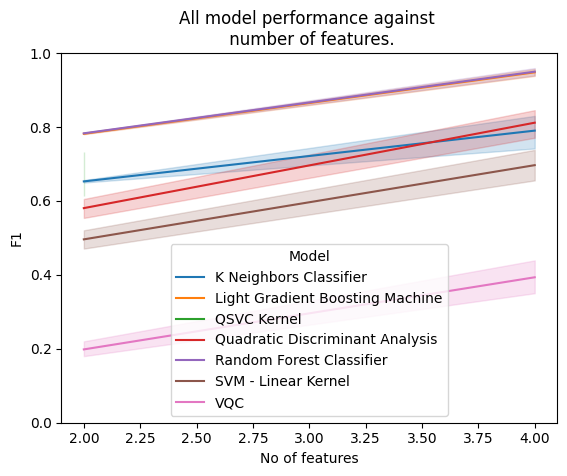

In [201]:
plt.ylim(0,1)
sns.lineplot(x="No of features", y="F1", data = df_model_grouped, hue="Model")
plt.title("All model performance against \n number of features.")
plt.savefig("../quantum-thesis-writing/media/All-models-vs-no-of-features.png")
plt.show()

In [207]:
df.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
0,VQC,2,1024,3,3,2.0,2.0,0.067383,0.296266
1,VQC,2,1024,4,3,2.0,2.0,0.050781,0.267571
2,VQC,2,1024,4,4,2.0,2.0,0.036133,0.356173
3,VQC,2,1024,5,3,2.0,2.0,0.026367,0.095207
4,VQC,2,1024,5,4,2.0,2.0,0.027344,0.240474


In [210]:
df_three_classes = df[df["No of classes"] == 3]

In [212]:
df_three_classes.head()

,Model,No of features,No of samples,No of classes,No of labels,No of feature map reps,No of ansatz reps,Accuracy,F1
0,VQC,2,1024,3,3,2.0,2.0,0.067383,0.296266
21,VQC,2,1024,3,3,8.0,8.0,0.175781,0.538256
1002,VQC,4,1024,3,3,3.0,3.0,0.184570,0.646613
1023,VQC,2,1024,3,3,3.0,3.0,0.146484,0.516243
1044,QSVC Kernel,2,1024,3,3,2.0,NaN,0.369141,0.817481
